Approach 1: HuggingFace API

In [ ]:
!pip install transformers


In [ ]:
!pip install requests

In [ ]:
import requests
import json
import pandas as pd
HF_TOKEN #= token
model_name = "EleutherAI/gpt-neo-2.7B"  # or "EleutherAI/gpt-neo-1.3B"


In [ ]:
# Function to parse the response and extract the generated text
def get_generated_text_from_response(response):
    # Check if the response is a list and has at least one item
    if isinstance(response, list) and len(response) > 0:
        # Check if the 'generated_text' key is present in the first item
        if "generated_text" in response[0]:
            return response[0]["generated_text"]
        else:
            return "Error: 'generated_text' key not found in response."
    else:
        return "Error in response: " + str(response)

# Example usage with the response from Hugging Face API
prompt = "Once upon a time in a distant land,"
response = query_huggingface_api(prompt)  # This should already be defined in your notebook
generated_text = get_generated_text_from_response(response)
print("Generated Text:", generated_text)


Generated Text: Once upon a time in a distant land, there lived a young woman named Eunice who was in love with a man named Eddie. Eddie was a wealthy and handsome man who had recently lost his father. Eunice wanted to marry him, but he was a man of few words and


Approach 2: Rule-based model

Generating multivariate data visualizations...


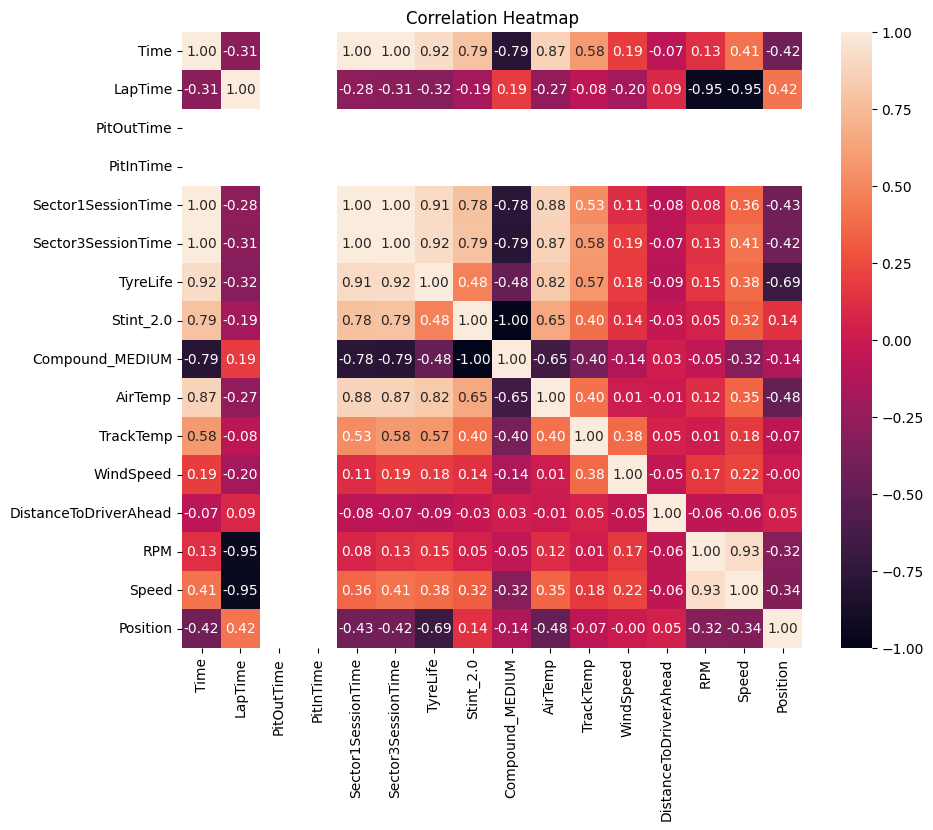

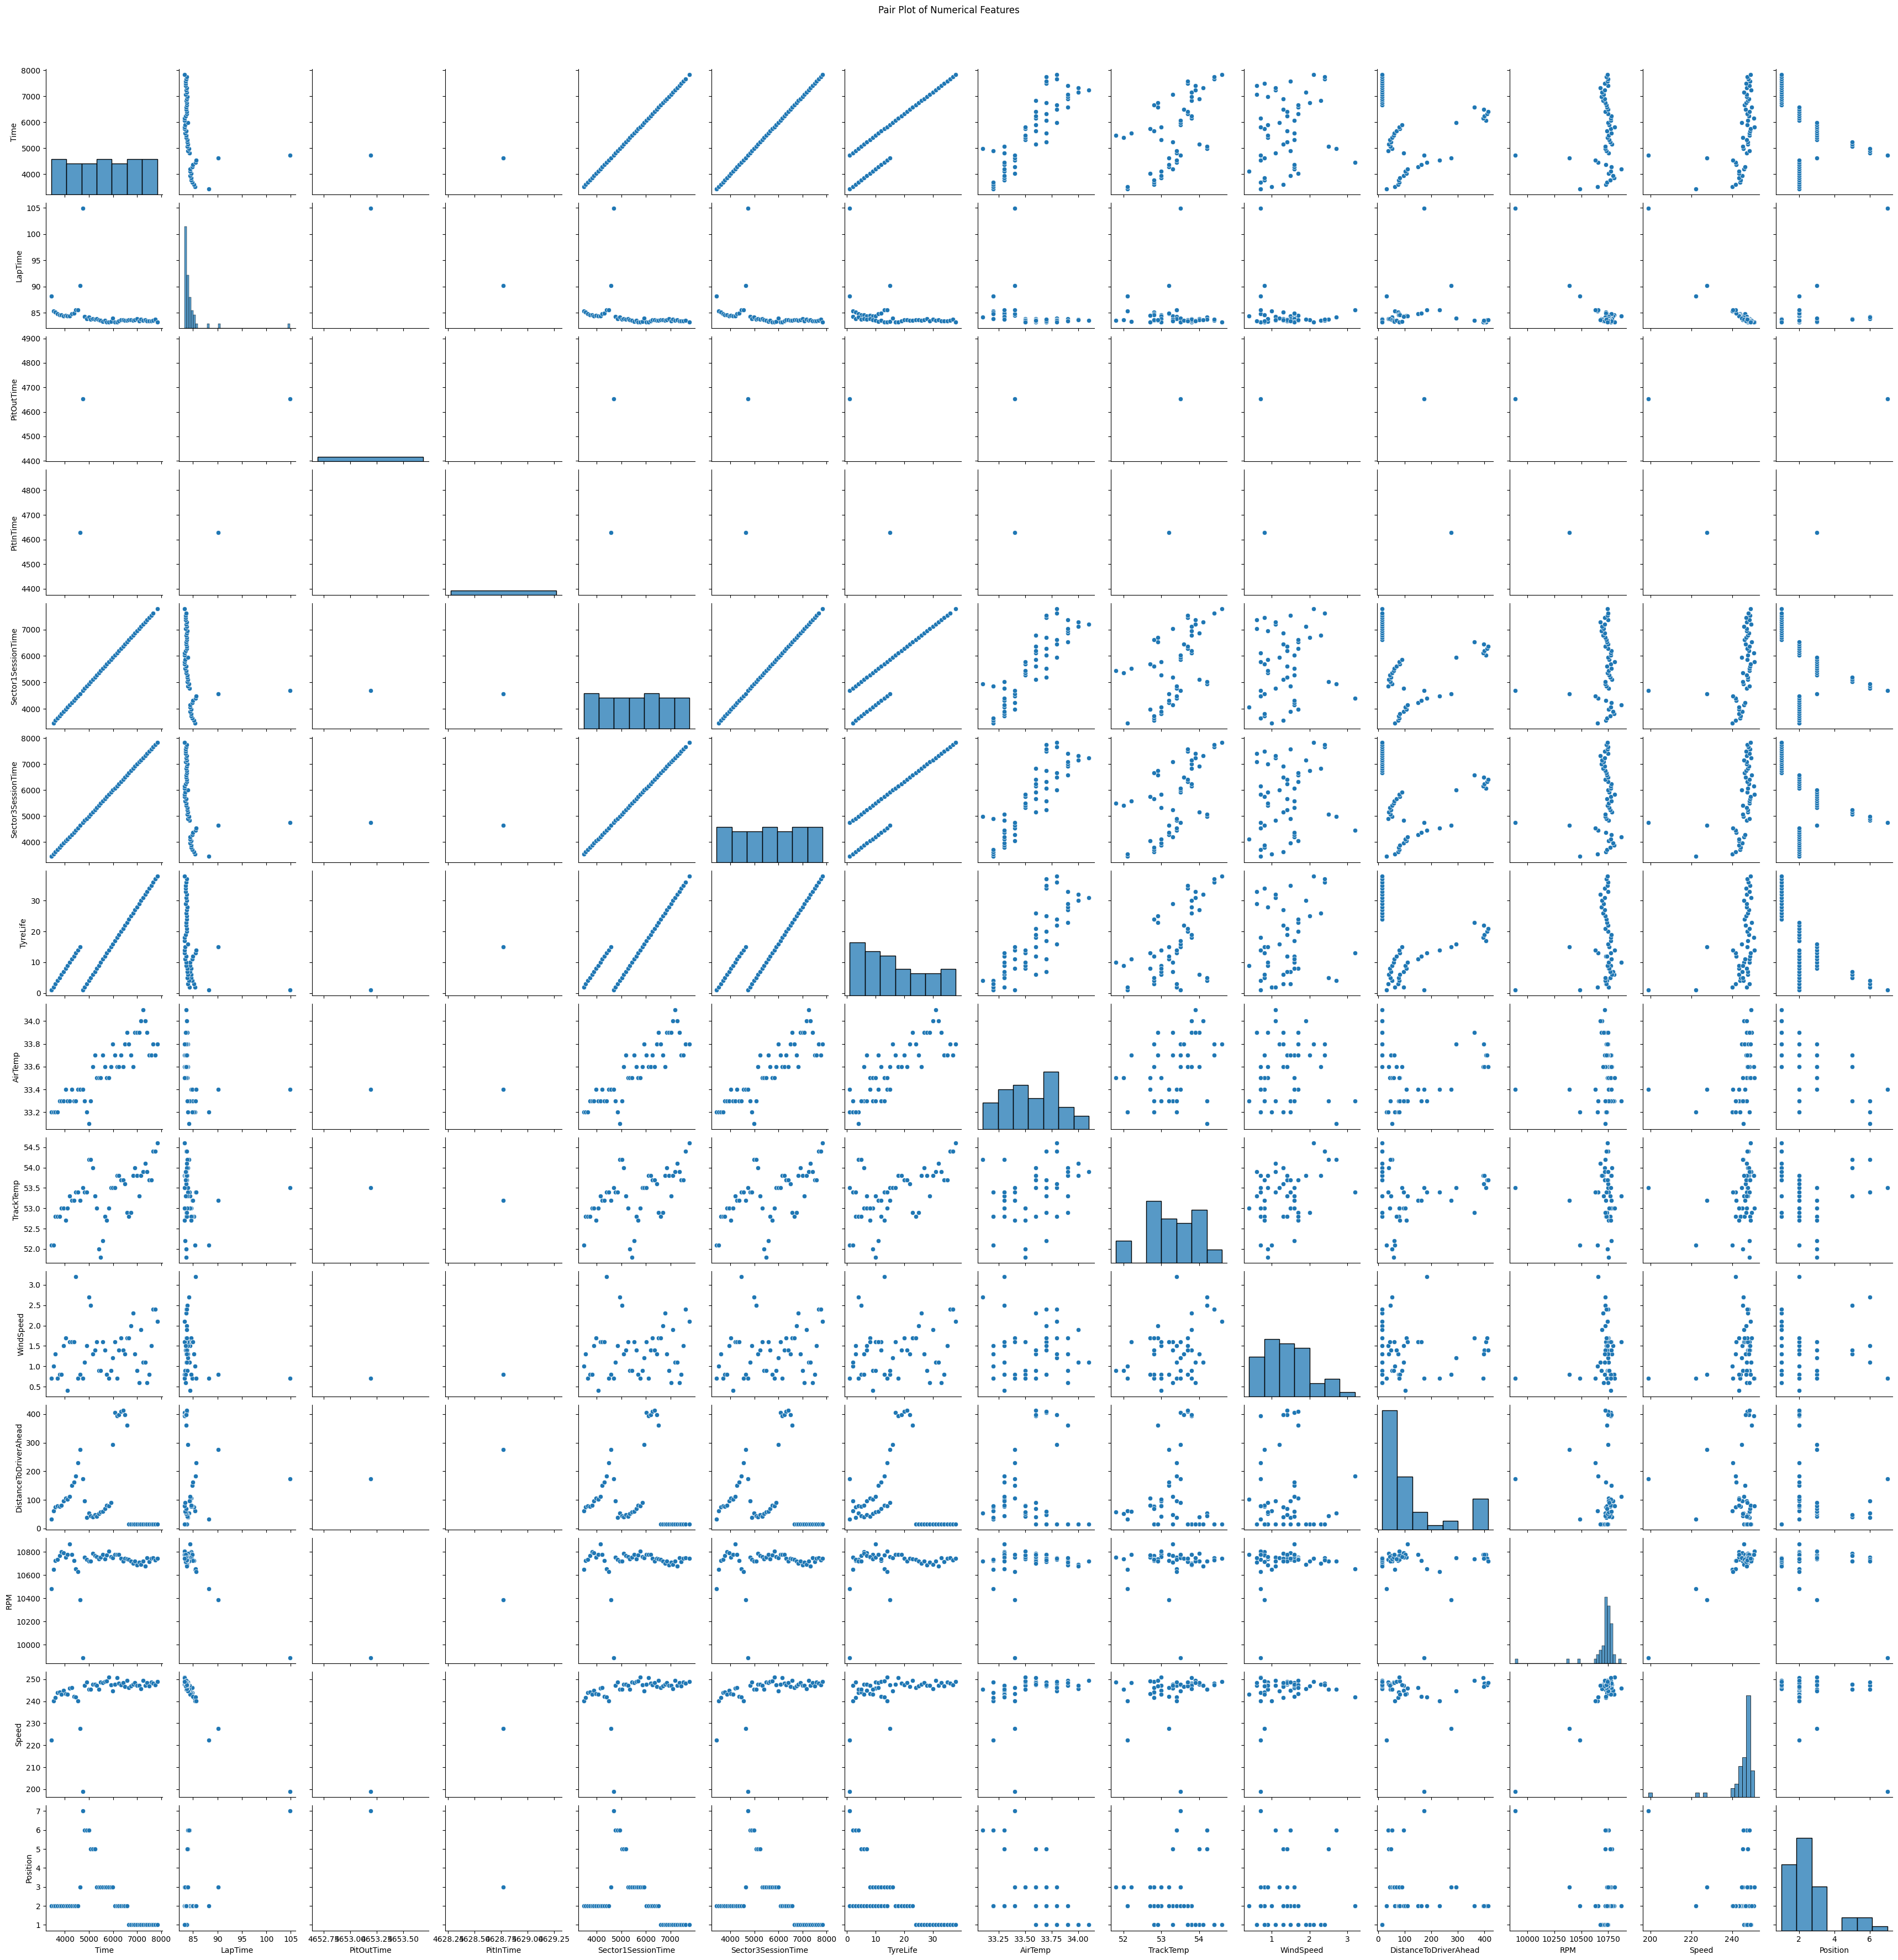

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and convert 'Time' and 'PitOutTime' columns from timedelta format to seconds
parse_timedelta = pd.to_timedelta
df = pd.read_csv('ads.csv', converters={'Time': parse_timedelta, 'PitOutTime': parse_timedelta, 'PitInTime': parse_timedelta})

# Ensure all timedelta columns are converted to seconds
for col in df.select_dtypes(include=['timedelta']).columns:
    df[col] = df[col].dt.total_seconds()

def perform_eda_summary(df):
    """Generate a basic EDA summary of the dataset in a tabular format."""

    # Get column information about data types
    column_info = pd.DataFrame(df.dtypes, columns=["Data Type"])

    # Generate summary statistics for numeric columns
    summary_statistics = df.describe().transpose()

    # Check for missing values in each column
    missing_values = pd.DataFrame(df.isnull().sum(), columns=["Missing Values"])

    # Summarize categorical columns with top value counts
    categorical_summaries = {}
    for col in df.select_dtypes(include=['object']).columns:
        top_categories = df[col].value_counts().head(3)
        categorical_summaries[col] = top_categories

    # Format categorical summaries into a DataFrame for easier readability
    categorical_summary_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in categorical_summaries.items()]))

    # Return the tables
    eda_summary = {
        "Column Data Types": column_info,
        "Summary Statistics": summary_statistics,
        "Missing Values": missing_values,
        "Top Categorical Summaries": categorical_summary_df
    }

    return eda_summary

def perform_multivariate_visualization(df):
    """Generate multivariate data visualizations for the dataset."""

    # Correlation heatmap for numerical features
    if not df.select_dtypes(include=['number']).empty:
        plt.figure(figsize=(10, 8))
        sns.heatmap(df.corr(), annot=True, fmt=".2f")
        plt.title("Correlation Heatmap")
        plt.show()

    # Pairplot for numerical features
    if len(df.select_dtypes(include=['number']).columns) > 1:
        sns.pairplot(df.select_dtypes(include=['number']))
        plt.suptitle("Pair Plot of Numerical Features", y=1.02)
        plt.show()

    # Box plots for numerical variables by categorical variables
    categorical_columns = df.select_dtypes(include=['object']).columns
    numerical_columns = df.select_dtypes(include=['number']).columns
    if len(categorical_columns) > 0 and len(numerical_columns) > 0:
        for num_col in numerical_columns:
            for cat_col in categorical_columns:
                plt.figure(figsize=(10, 6))
                sns.boxplot(x=cat_col, y=num_col, data=df)
                plt.title(f"Box Plot of {num_col} by {cat_col}")
                plt.xticks(rotation=45)
                plt.show()

def search_dataset(prompt):
    # Check if the prompt contains a request to analyze the dataset
    if "analyse the dataset using eda" in prompt.lower():
        eda_summary = perform_eda_summary(df)

        # Print out the EDA tables
        for section, data in eda_summary.items():
            print(f"{section}:\n", data, "\n")

    elif "multi-variate data visualization" in prompt.lower():
        print("Generating multivariate data visualizations...")
        perform_multivariate_visualization(df)

    else:
        print("No relevant analysis found for the given prompt.")

# Example usage with a prompt:
prompt = "multi-variate data visualization"
search_dataset(prompt)


Performing pitstop analysis for all drivers...


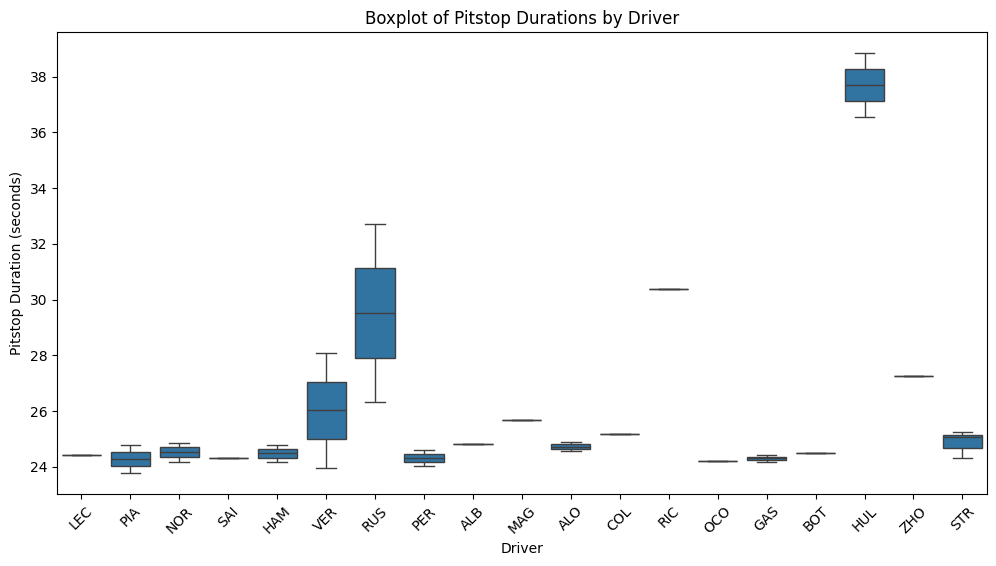

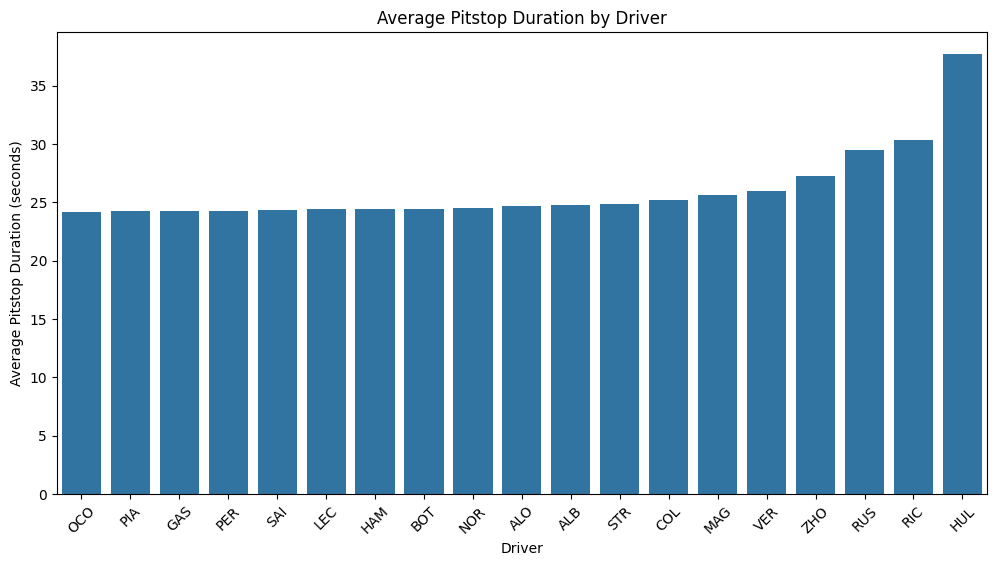

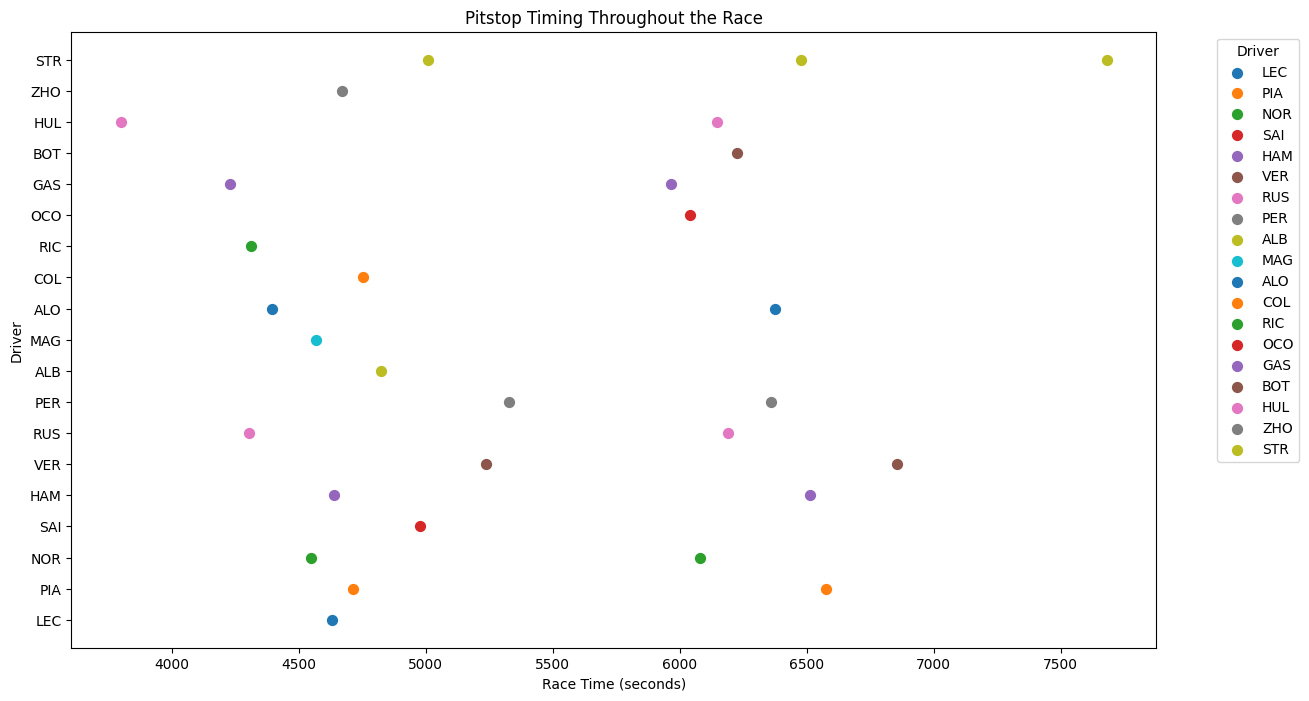

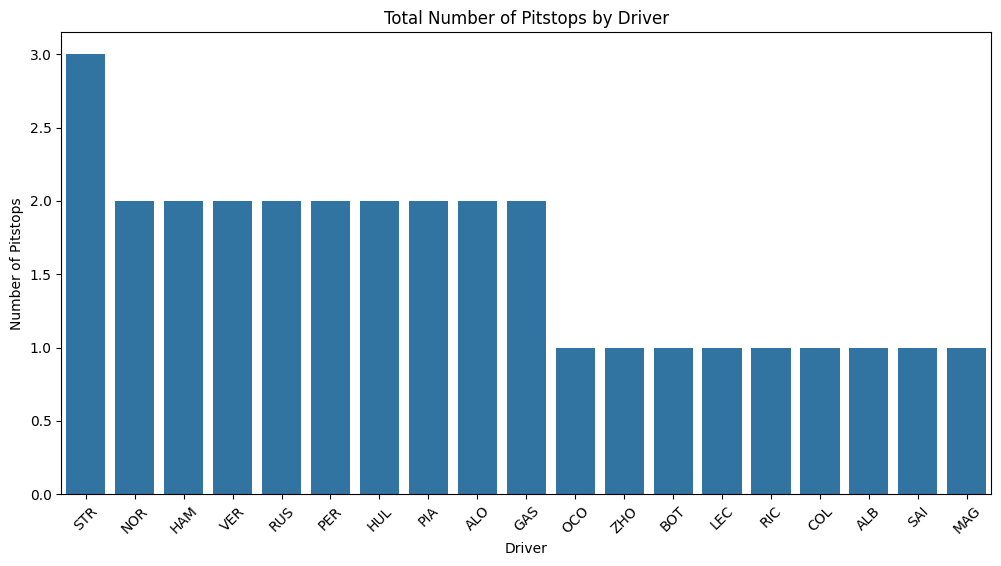

In [ ]:
#pitstop analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and convert 'Time', 'PitOutTime', and 'PitInTime' columns from timedelta format to seconds
parse_timedelta = pd.to_timedelta
df = pd.read_csv('laps.csv', converters={'Time': parse_timedelta, 'PitOutTime': parse_timedelta, 'PitInTime': parse_timedelta})

# Ensure all timedelta columns are converted to seconds
for col in df.select_dtypes(include=['timedelta']).columns:
    df[col] = df[col].dt.total_seconds()

# Function to calculate PitstopDuration and perform the analysis
def pitstop_analysis(df):
    # Calculate PitstopDuration assuming PitInTime is in row i and PitOutTime is in row i+1
    df['PitstopDuration'] = None
    for i in range(len(df) - 1):
        if pd.notnull(df.loc[i, 'PitInTime']) and pd.notnull(df.loc[i + 1, 'PitOutTime']) and df.loc[i, 'Driver'] == df.loc[i + 1, 'Driver']:
            df.loc[i, 'PitstopDuration'] = df.loc[i + 1, 'PitOutTime'] - df.loc[i, 'PitInTime']

    # Drop rows with missing PitstopDuration
    df = df.dropna(subset=['PitstopDuration'])

    # 1. Boxplot of Pitstop Durations by Driver
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Driver', y='PitstopDuration', data=df)
    plt.title('Boxplot of Pitstop Durations by Driver')
    plt.xlabel('Driver')
    plt.ylabel('Pitstop Duration (seconds)')
    plt.xticks(rotation=45)
    plt.show()

    # 2. Bar Plot of Average Pitstop Duration by Driver
    avg_pitstop_duration = df.groupby('Driver')['PitstopDuration'].mean().sort_values()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=avg_pitstop_duration.index, y=avg_pitstop_duration.values)
    plt.title('Average Pitstop Duration by Driver')
    plt.xlabel('Driver')
    plt.ylabel('Average Pitstop Duration (seconds)')
    plt.xticks(rotation=45)
    plt.show()

    # 3. Pitstop Timing Plot (Race Timeline)
    plt.figure(figsize=(14, 8))
    for driver in df['Driver'].unique():
        driver_pitstops = df[df['Driver'] == driver]
        plt.scatter(driver_pitstops['Time'], [driver] * len(driver_pitstops), label=driver, s=50)

    plt.title('Pitstop Timing Throughout the Race')
    plt.xlabel('Race Time (seconds)')
    plt.ylabel('Driver')
    plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # 4. Bar Plot of Total Number of Pitstops by Driver
    pitstop_counts = df['Driver'].value_counts()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=pitstop_counts.index, y=pitstop_counts.values)
    plt.title('Total Number of Pitstops by Driver')
    plt.xlabel('Driver')
    plt.ylabel('Number of Pitstops')
    plt.xticks(rotation=45)
    plt.show()

# LLM Functionality
def respond_to_prompt(prompt):
    if "give pitstop analysis of all drivers" in prompt.lower():
        print("Performing pitstop analysis for all drivers...")
        pitstop_analysis(df)
    else:
        print("No relevant analysis found for the given prompt.")

# Example usage
prompt = "Give pitstop analysis of all drivers"
respond_to_prompt(prompt)


Approach 3: AutoViz [NOT AN LLM]

In [ ]:
pip install autoviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 38.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.2
    Uninstalling xgboost-2.1.2:
      Successfully uninstalled xgboost-2.1.2


Shape of your Data Set loaded: (53, 16)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing up to 30 columns (max) in each category:
    Numeric Columns : ['LapTime', 'Sector1SessionTime', 'Sector3SessionTime', 'TyreLife', 'TrackTemp', 'WindSpeed', 'DistanceToDriverAhead', 'RPM', 'Speed', 'AirTemp', 'Position']
    Integer-Categorical Columns: []
    String-Categorical Columns: []
    Factor-Categorical Columns: []
    String-Boolean Columns: ['Stint_2.0', 'Compound_MEDIUM']
    Numeric-Boolean Columns: []
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: []
    ID Columns: ['Time']
    Columns that will not be considered in modeling: ['PitOutTime', 'PitInTime']
    16 Predictors classified...
       

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Time,object,0.000000,100,,,Possible ID column: drop before modeling step.
LapTime,float64,0.000000,NA,83.226000,104.888000,Column has 3 outliers greater than upper bound (85.76) or lower than lower bound(82.22). Cap them or remove them.
PitOutTime,object,98.113208,1,,,"Possible Zero-variance or low information colum: drop before modeling step., 52 missing values. Impute them with mean, median, mode, or a constant value such as 123."
PitInTime,object,98.113208,1,,,"Possible Zero-variance or low information colum: drop before modeling step., 52 missing values. Impute them with mean, median, mode, or a constant value such as 123."
Sector1SessionTime,float64,3.773585,NA,3466.661000,7775.519000,"2 missing values. Impute them with mean, median, mode, or a constant value such as 123."
Sector3SessionTime,float64,0.000000,NA,3439.087000,7831.502000,Column has a high correlation with ['Sector1SessionTime']. Consider dropping one of them.
TyreLife,float64,0.000000,NA,1.000000,38.000000,"Column has a high correlation with ['Sector1SessionTime', 'Sector3SessionTime']. Consider dropping one of them."
Stint_2.0,bool,0.000000,3,0.000000,1.000000,No issue
Compound_MEDIUM,bool,0.000000,3,0.000000,1.000000,No issue
AirTemp,float64,0.000000,NA,33.100000,34.100000,"Column has a high correlation with ['Sector1SessionTime', 'Sector3SessionTime', 'TyreLife']. Consider dropping one of them."


Number of All Scatter Plots = 66
All Plots are saved in ./AutoViz_Plots/AutoViz
Time to run AutoViz = 15 seconds 


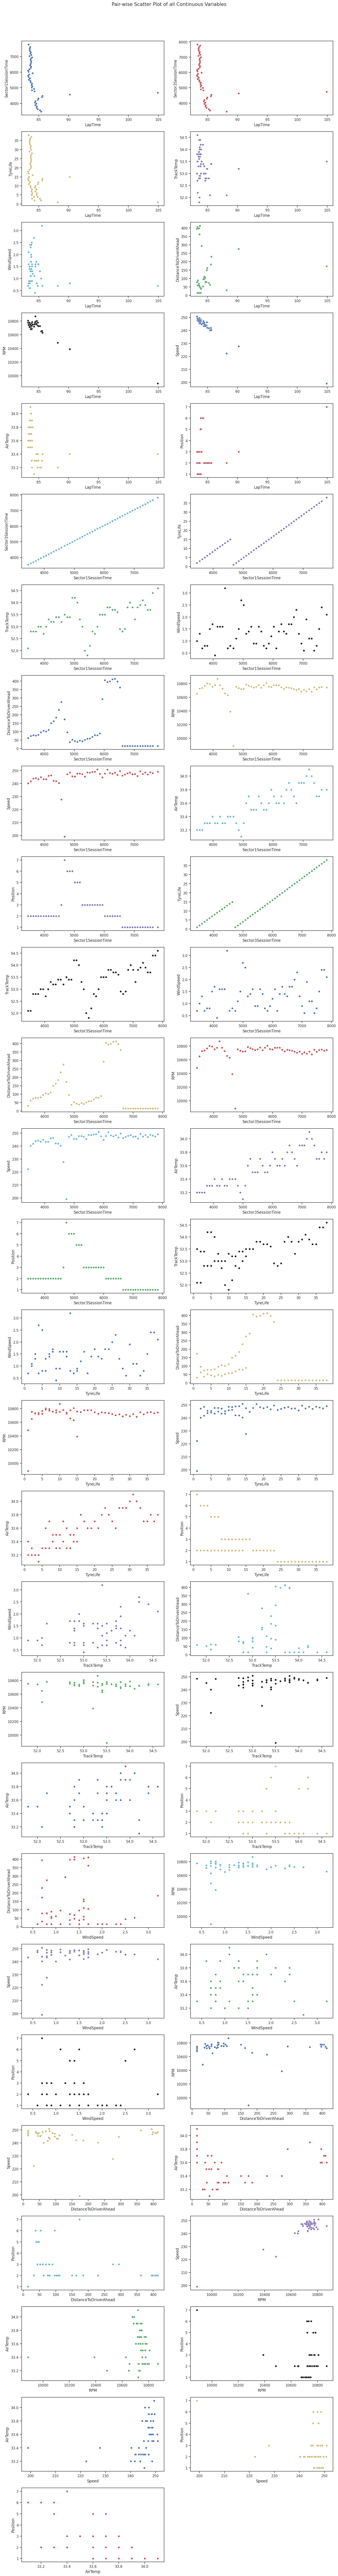

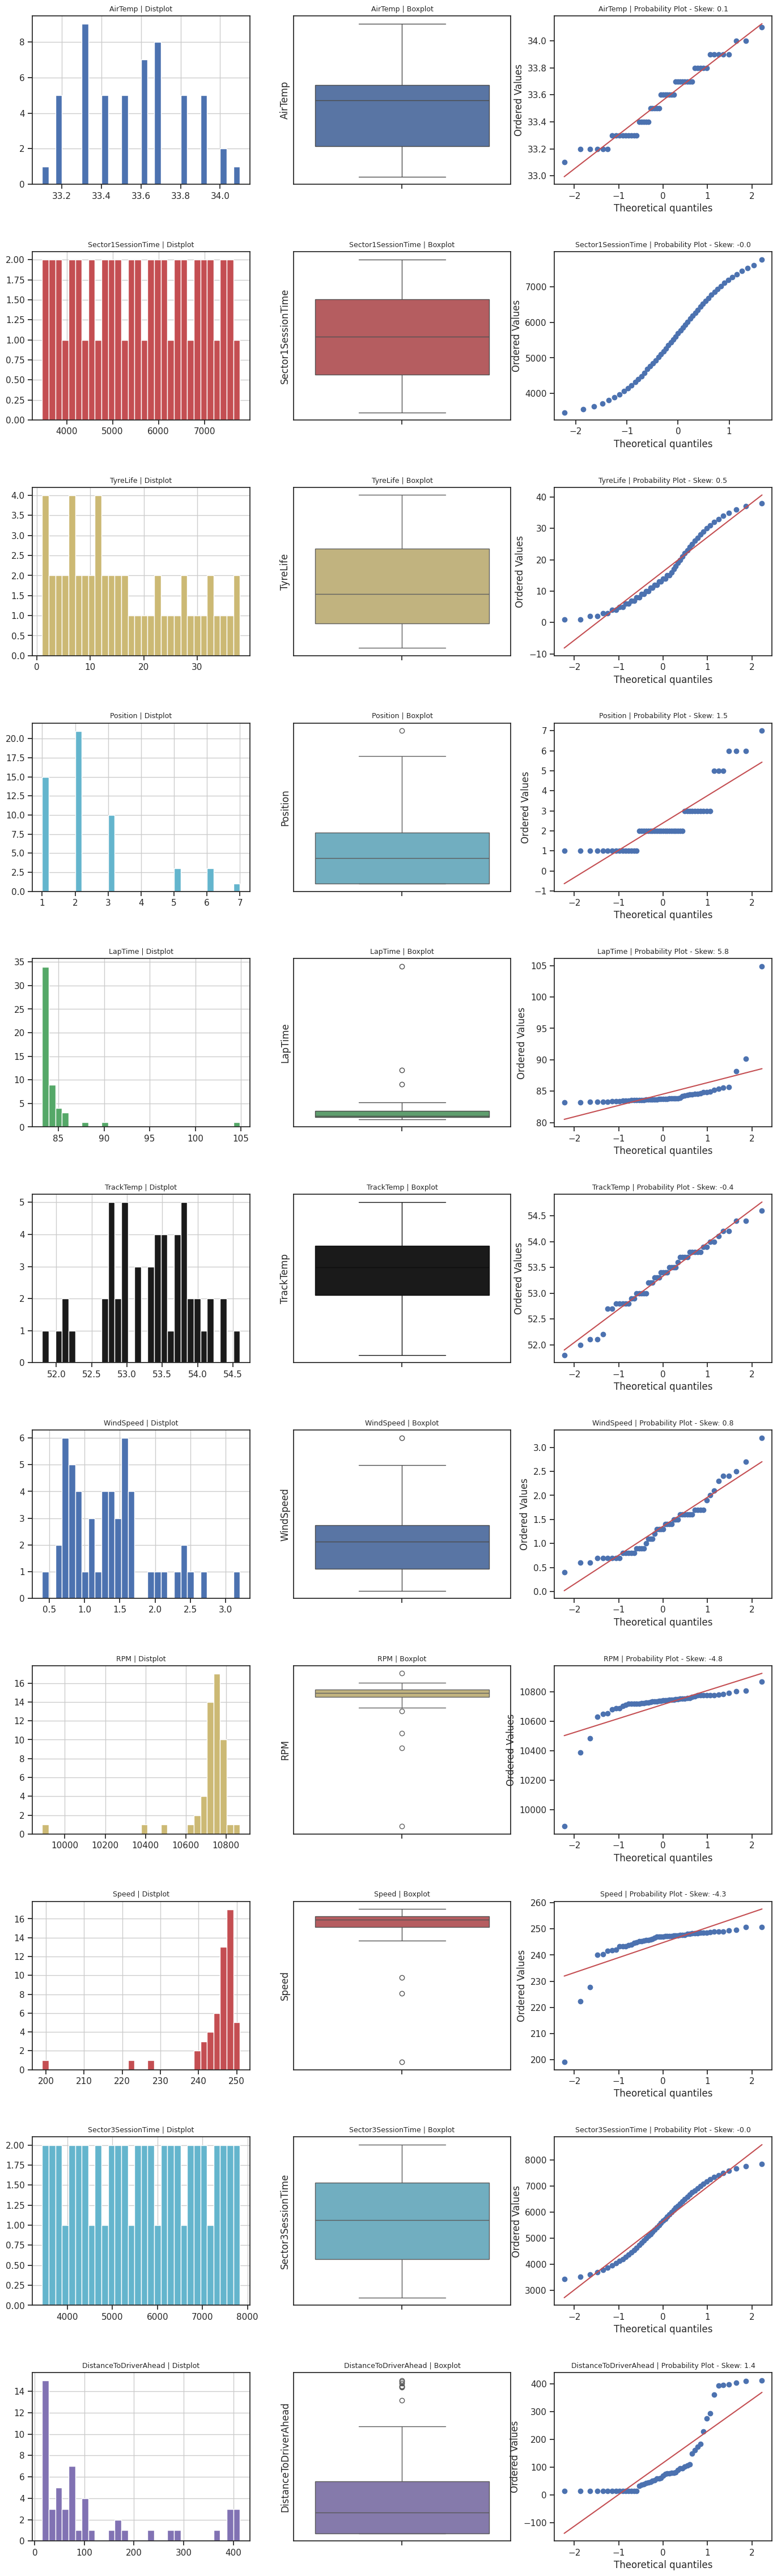

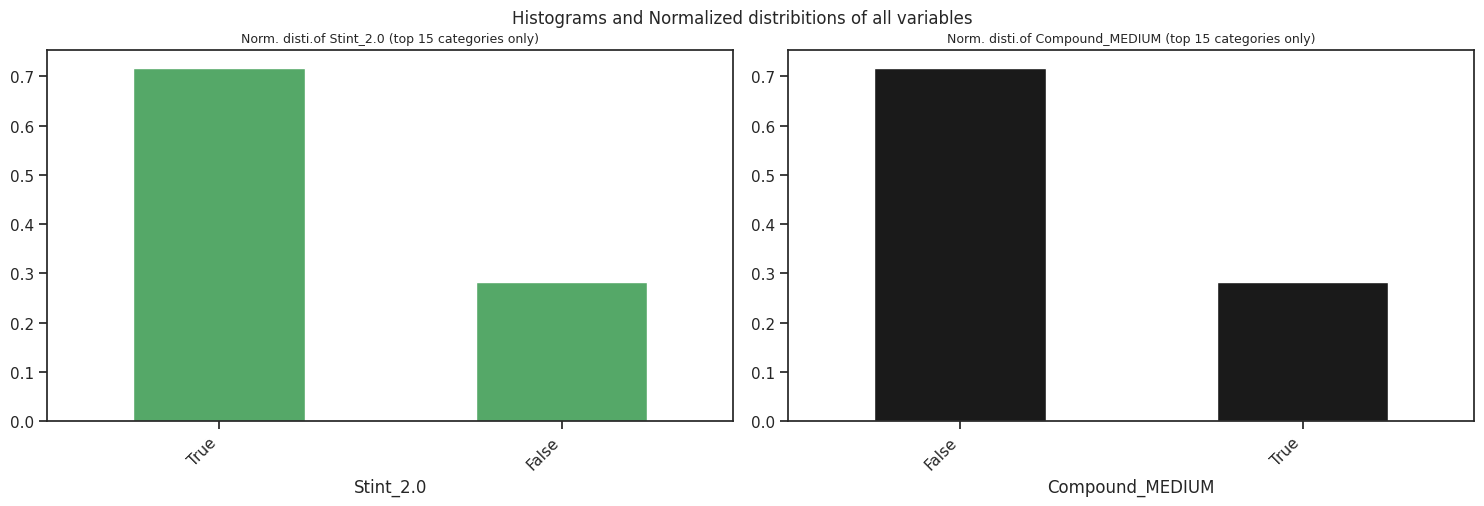

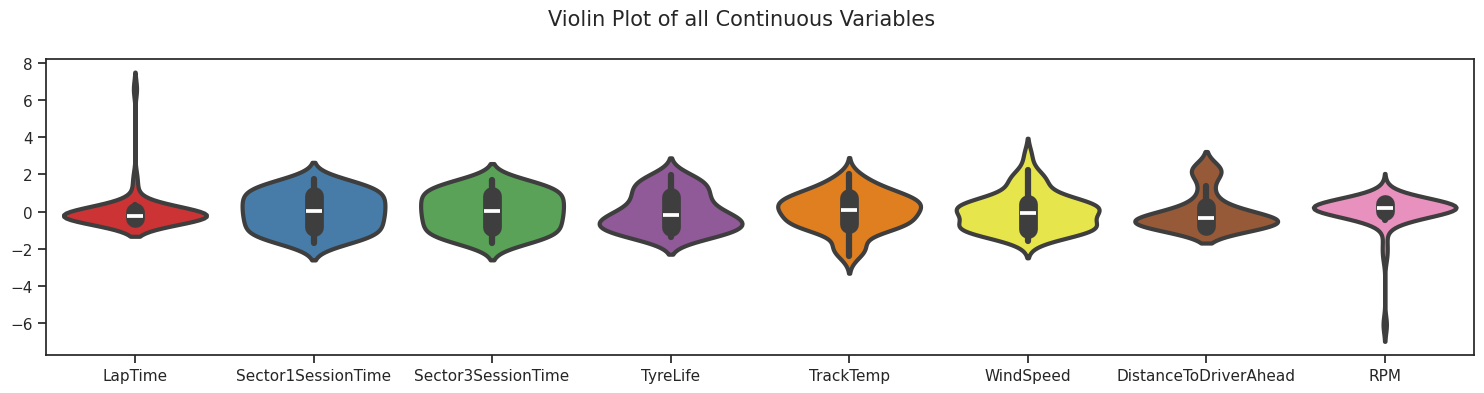

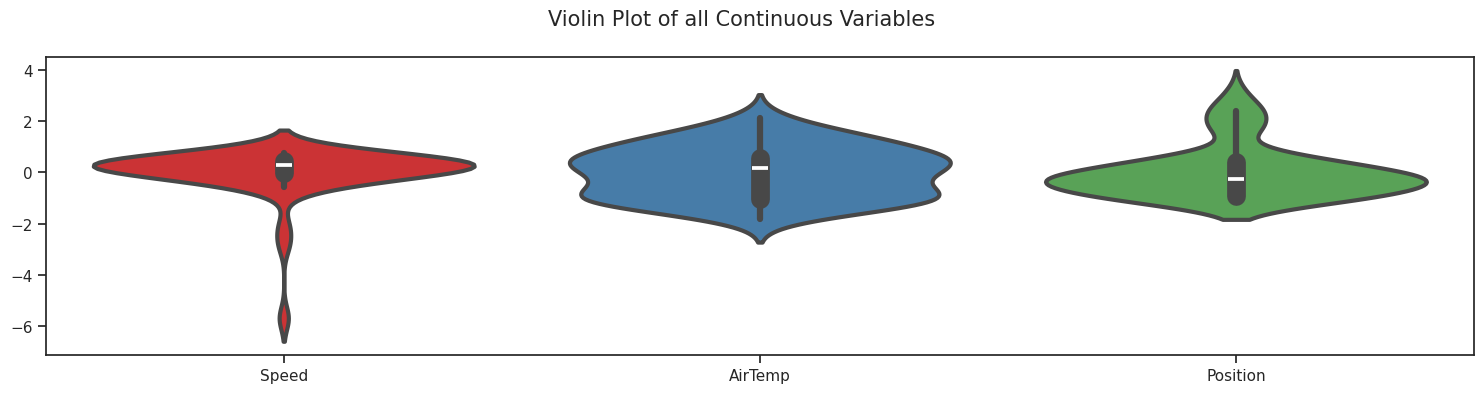

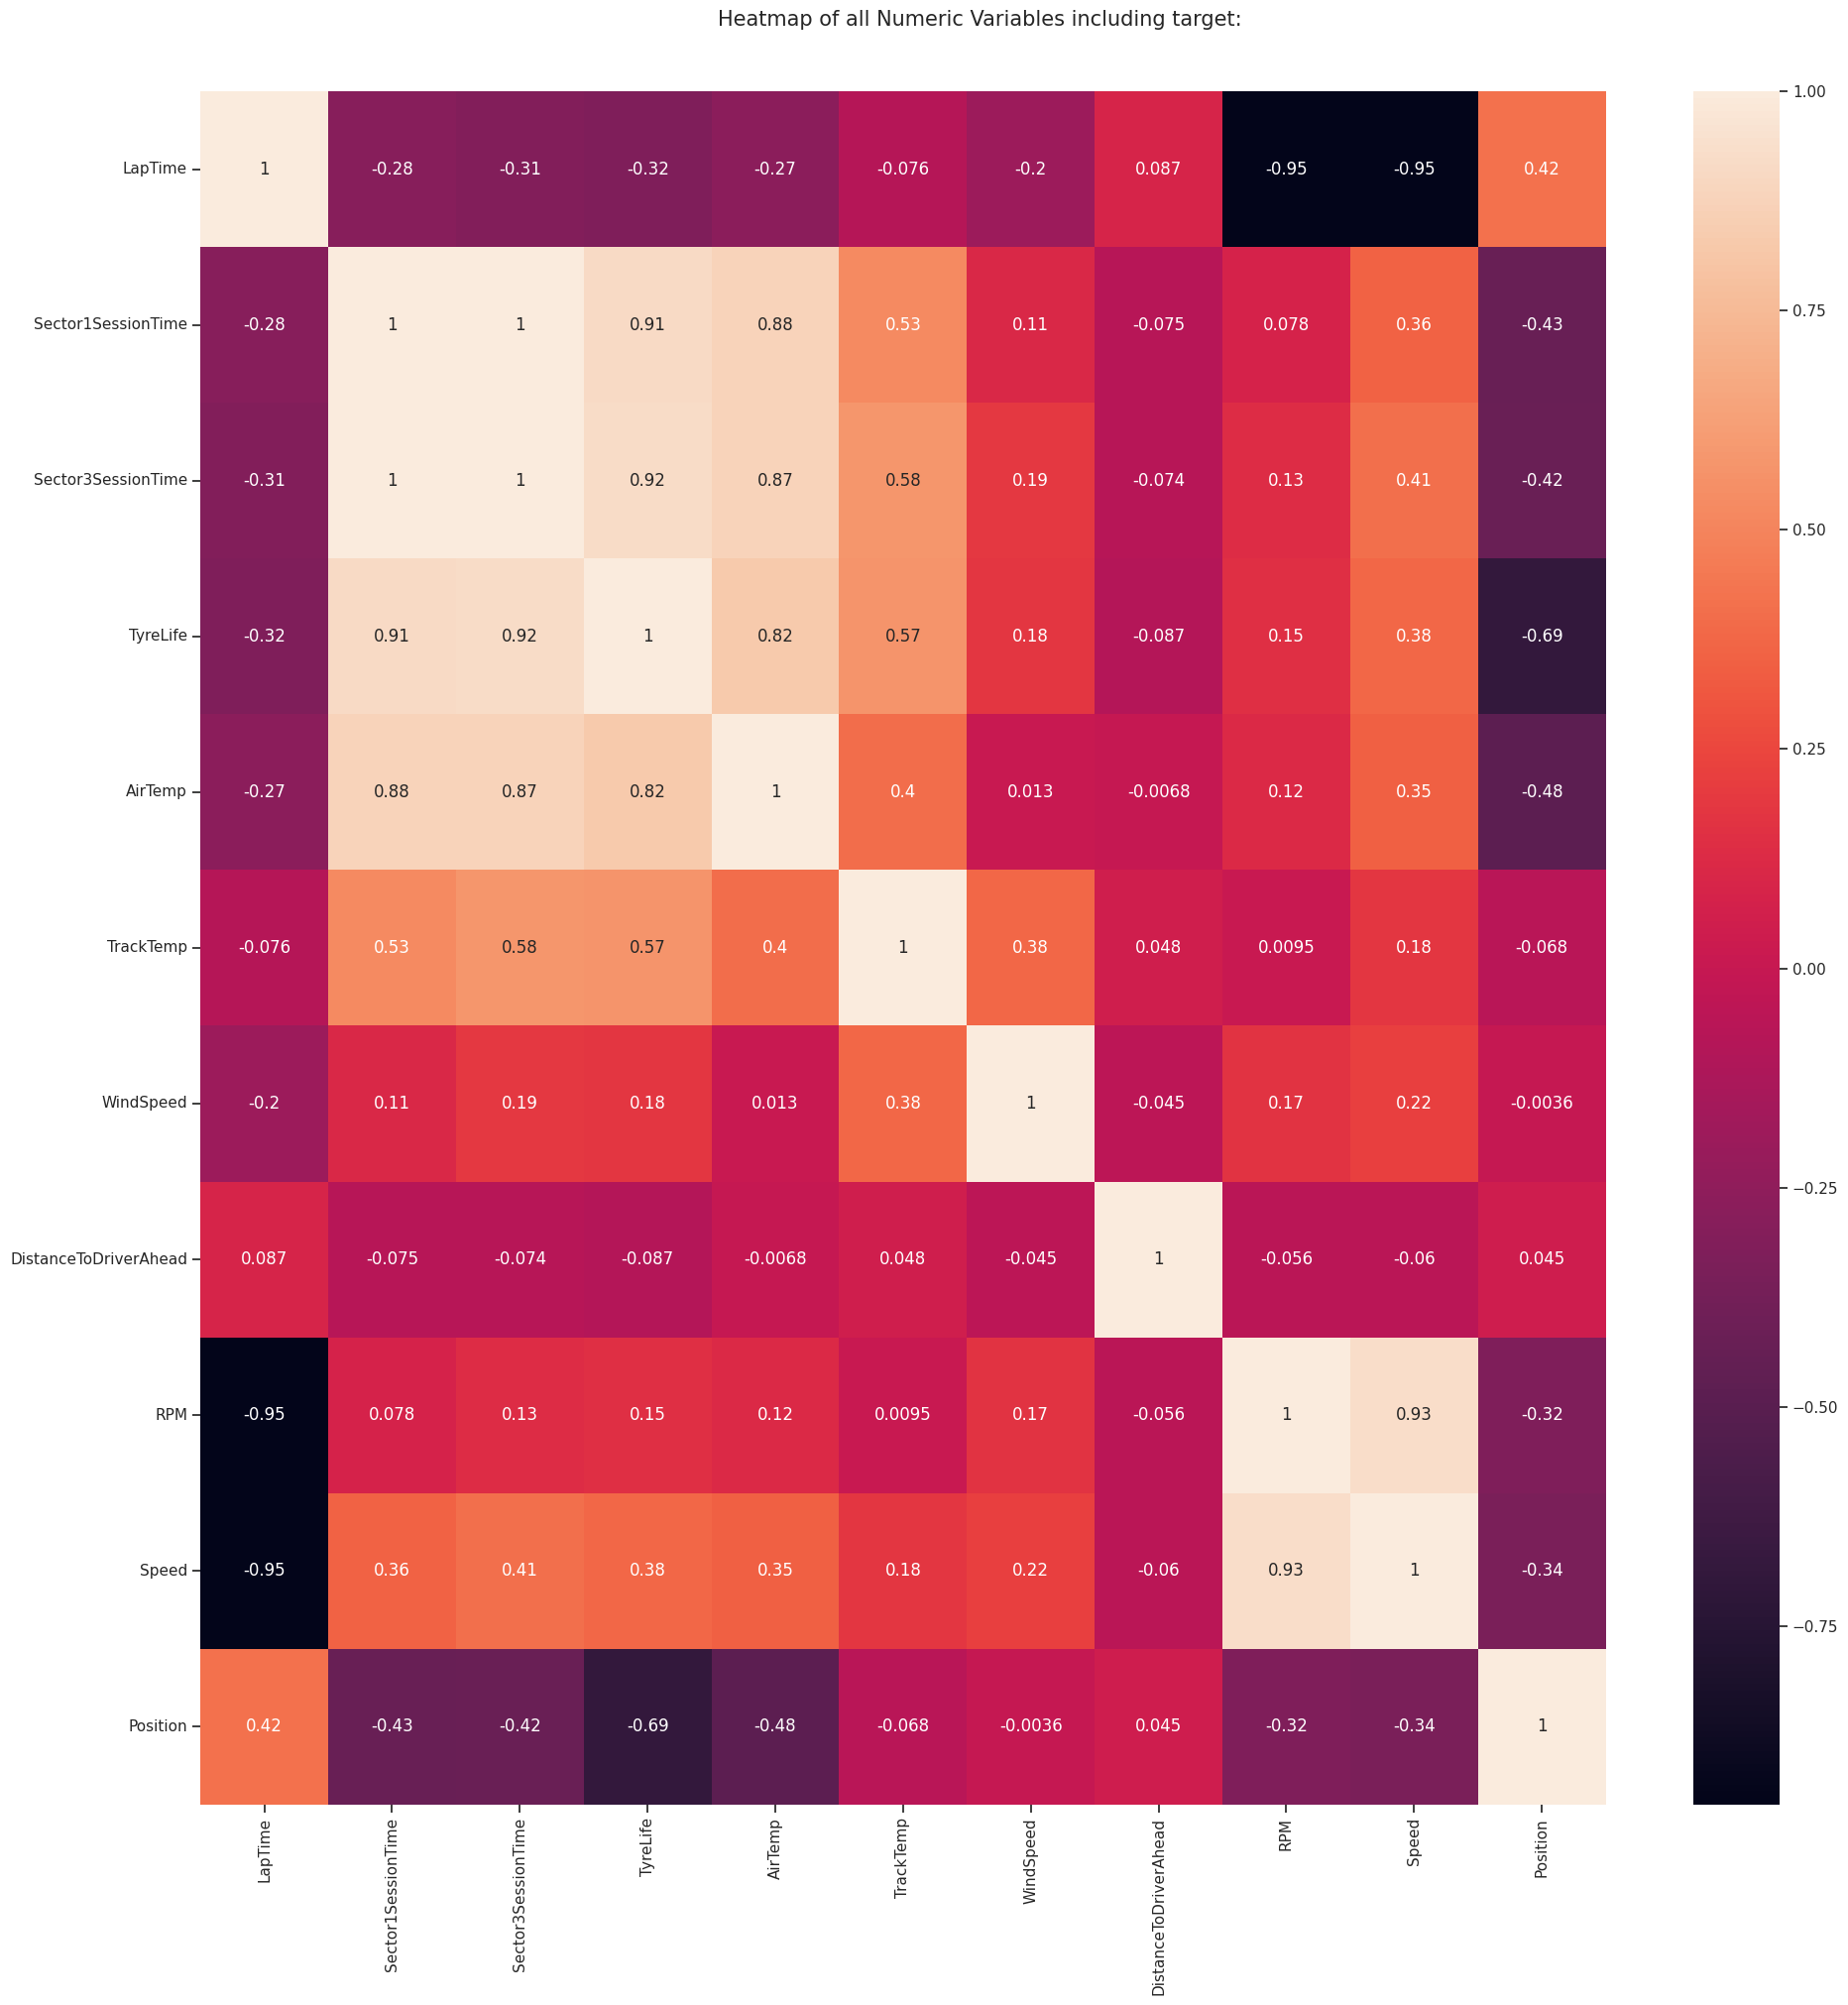

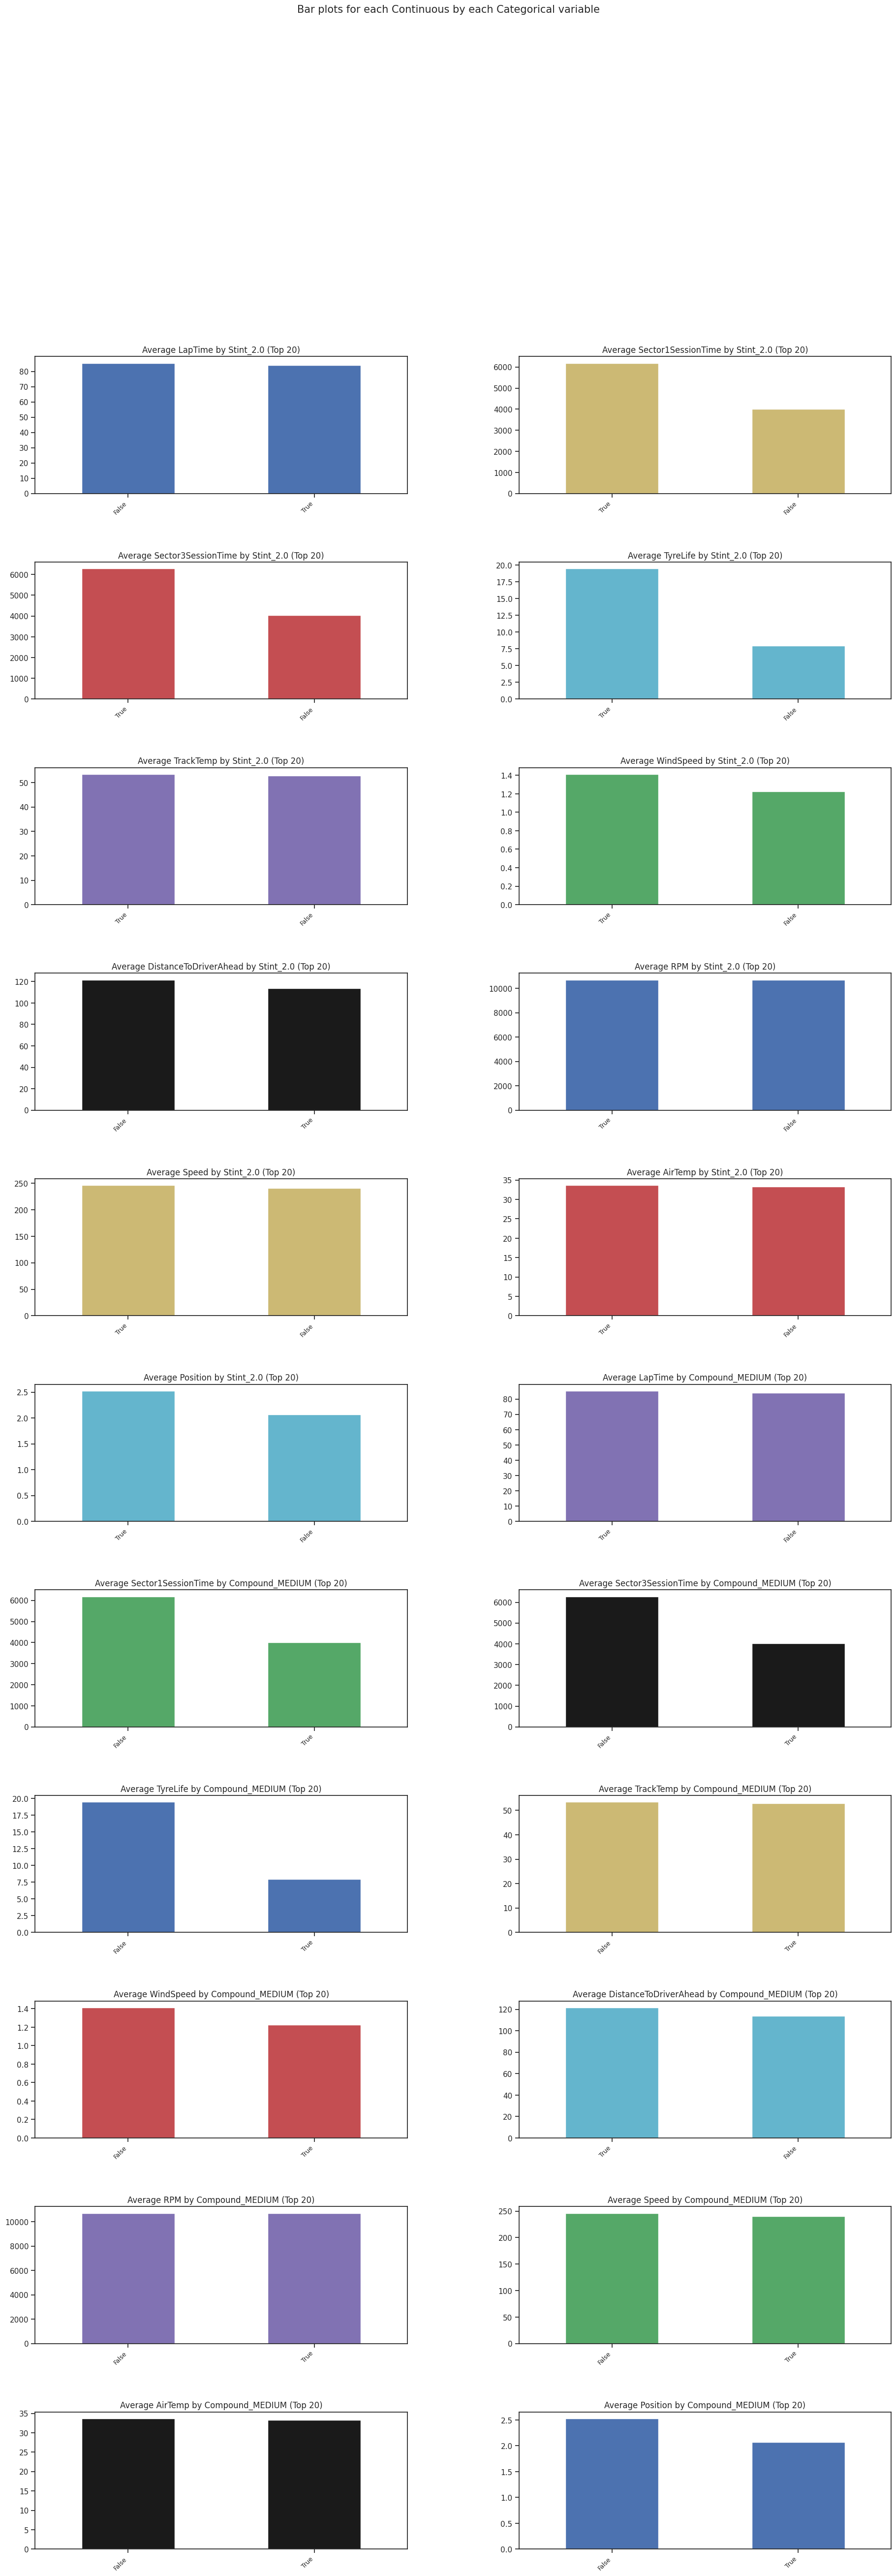

In [ ]:
import pandas as pd
from autoviz.AutoViz_Class import AutoViz_Class
import matplotlib.pyplot as plt

# Ensure plots are displayed inline (for Jupyter Notebook)
%matplotlib inline

# Load your dataset
df = pd.read_csv('ads.csv')

# Initialize AutoViz
AV = AutoViz_Class()

# Generate visualizations
df_visual = AV.AutoViz(
    filename="",
    dfte=df,
    depVar='',  # Use an empty string instead of None
    verbose=2,
    lowess=False
)

